# Modelo de Inteligencia Artificial para la Predicción del Riesgo de Deserción Escolar en la Educación Secundaria en un Marco Ético y Socialmente Responsable
### Autor: Lezly Jhovanna Carmona Saavedra
### Asesor: Ricardo Trujillo
### Universidad: Universidad Internacional de Valencia VIU
### Año: 2025
### Descripción:
Modelo de aprendizaje supervisado para predecir el riesgo de deserción escolar en estudiantes de secundaria, incluyendo preprocesamiento, entrenamiento y visualización de resultados.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

#### Carga de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("desercion_escolar_limpio.csv")

# Codificar variables categóricas
df_encoded = df.copy()
categorical_columns = ["municipio", "institucion_educativa", "jornada_escolar", "estado_emocional"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [3]:
print(df.count())

nombre_estudiante           2820620
municipio                   2820620
institucion_educativa       2820620
grado                       2820620
promedio_notas              2820620
inasistencias               2820620
edad                        2820620
estrato_socioeconomico      2820620
repitencia                  2820620
jornada_escolar             2820620
subsidios                   2820620
estado_emocional            2820620
tasa_desercion_municipal    2820620
deserta                     2820620
dtype: int64


In [4]:
# Eliminacion de datos NAN (Se identificaron solamente 7 )
df = df.dropna().reset_index(drop=True)

In [5]:
print(df.count())

nombre_estudiante           2820620
municipio                   2820620
institucion_educativa       2820620
grado                       2820620
promedio_notas              2820620
inasistencias               2820620
edad                        2820620
estrato_socioeconomico      2820620
repitencia                  2820620
jornada_escolar             2820620
subsidios                   2820620
estado_emocional            2820620
tasa_desercion_municipal    2820620
deserta                     2820620
dtype: int64


In [6]:
# Eliminnacion de cololumnas que categoricas que no aportan al modelo (nombre_estudiante, institucion_educativa
df_final = df
df_final = df_final.drop(columns=['institucion_educativa'])

In [7]:
display(df_final)

,nombre_estudiante,municipio,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,jornada_escolar,subsidios,estado_emocional,tasa_desercion_municipal,deserta
0,Estudiante_1,Buenaventura,Grado 10,2.08,11,14,1,0,tarde,1,bueno,5.83,1
1,Estudiante_2,Buga,Grado 11,4.08,10,14,2,0,completa,0,bueno,6.09,0
2,Estudiante_3,Palmira,Grado 9,2.25,6,14,1,0,tarde,0,bueno,3.41,1
3,Estudiante_4,Buga,Grado 10,4.73,3,17,1,0,tarde,0,malo,3.87,1
4,Estudiante_5,Buga,Grado 6,3.39,3,15,1,1,mañana,1,regular,4.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820615,Estudiante_831,Buenaventura,Grado 7,2.15,8,12,2,1,mañana,0,bueno,4.09,1
2820616,Estudiante_937,Tuluá,Grado 6,4.43,2,14,1,0,completa,1,regular,5.11,0
2820617,Estudiante_1,Buenaventura,Grado 10,2.08,11,14,1,0,tarde,1,bueno,5.83,1
2820618,Estudiante_623,Buenaventura,Grado 6,2.61,9,13,2,0,tarde,1,regular,3.31,1


In [8]:
# 1. Convertir 'grado' a número (extraer solo el número)
df_final['grado'] = df_final['grado'].str.extract('(\d+)').astype(int)

# 2. LabelEncoder para 'municipio', 'jornada_escolar', 'estado_emocional'
label_cols = ['jornada_escolar', 'estado_emocional']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le  # Por si querés decodificar después

# Listo pa'l modelo
print(df_final.dtypes)

nombre_estudiante            object
municipio                    object
grado                         int64
promedio_notas              float64
inasistencias                 int64
edad                          int64
estrato_socioeconomico        int64
repitencia                    int64
jornada_escolar               int64
subsidios                     int64
estado_emocional              int64
tasa_desercion_municipal    float64
deserta                       int64
dtype: object


In [9]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Hacemos One-Hot Encoding solo para 'municipio'
import unidecode

# Normalizar nombres de municipio (quita tildes)
df_final['municipio'] = df_final['municipio'].apply(lambda x: unidecode.unidecode(x))

df_final = pd.get_dummies(df_final, columns=['municipio'], prefix='muni', drop_first=False)

# Aplicar one hot encoding para estado_emocional y jornada_escolar
# Asegurar que estén como string
df_final['estado_emocional'] = df_final['estado_emocional'].astype(str)
df_final['jornada_escolar'] = df_final['jornada_escolar'].astype(str)

# Hacer one-hot encoding
df_final = pd.get_dummies(
    df_final,
    columns=['estado_emocional', 'jornada_escolar'],
    prefix=['emo', 'jornada'],
    drop_first=False
)


# Convertir los muni_ a enteros
df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
df_final.loc[:, df_final.columns.str.startswith('emo_')] = df_final.loc[:, df_final.columns.str.startswith('emo_')].astype(int)
df_final.loc[:, df_final.columns.str.startswith('jornada_')] = df_final.loc[:, df_final.columns.str.startswith('jornada_')].astype(int)


/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[:, df_final.columns.str.startswith('muni_')] = df_final.loc[:, df_final.columns.str.startswith('muni_')].astype(int)
/tmp/ipykernel_9167/1745545643.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, pleas

In [11]:
display(df_final)

,nombre_estudiante,grado,promedio_notas,inasistencias,edad,estrato_socioeconomico,repitencia,subsidios,tasa_desercion_municipal,deserta,...,muni_Buga,muni_Cali,muni_Palmira,muni_Tulua,emo_0,emo_1,emo_2,jornada_0,jornada_1,jornada_2
0,Estudiante_1,10,2.08,11,14,1,0,1,5.83,1,...,0,0,0,0,1,0,0,0,0,1
1,Estudiante_2,11,4.08,10,14,2,0,0,6.09,0,...,1,0,0,0,1,0,0,1,0,0
2,Estudiante_3,9,2.25,6,14,1,0,0,3.41,1,...,0,0,1,0,1,0,0,0,0,1
3,Estudiante_4,10,4.73,3,17,1,0,0,3.87,1,...,1,0,0,0,0,1,0,0,0,1
4,Estudiante_5,6,3.39,3,15,1,1,1,4.73,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820615,Estudiante_831,7,2.15,8,12,2,1,0,4.09,1,...,0,0,0,0,1,0,0,0,1,0
2820616,Estudiante_937,6,4.43,2,14,1,0,1,5.11,0,...,0,0,0,1,0,0,1,1,0,0
2820617,Estudiante_1,10,2.08,11,14,1,0,1,5.83,1,...,0,0,0,0,1,0,0,0,0,1
2820618,Estudiante_623,6,2.61,9,13,2,0,1,3.31,1,...,0,0,0,0,0,0,1,0,0,1


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820620 entries, 0 to 2820619
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   nombre_estudiante         object 
 1   grado                     int64  
 2   promedio_notas            float64
 3   inasistencias             int64  
 4   edad                      int64  
 5   estrato_socioeconomico    int64  
 6   repitencia                int64  
 7   subsidios                 int64  
 8   tasa_desercion_municipal  float64
 9   deserta                   int64  
 10  muni_Buenaventura         int64  
 11  muni_Buga                 int64  
 12  muni_Cali                 int64  
 13  muni_Palmira              int64  
 14  muni_Tulua                int64  
 15  emo_0                     int64  
 16  emo_1                     int64  
 17  emo_2                     int64  
 18  jornada_0                 int64  
 19  jornada_1                 int64  
 20  jornada_2               

#### Limpieza de datos

In [13]:
# Sacar la columna objetivo
target = df_final['deserta']

# Eliminarla del dataframe
df_final = df_final.drop(columns=['deserta'])

# Reinsertarla al final
df_final['deserta'] = target

In [14]:
# Eliminar filas donde la variable objetivo es NaN
df_final = df_final[df_final['deserta'].notna()].reset_index(drop=True)

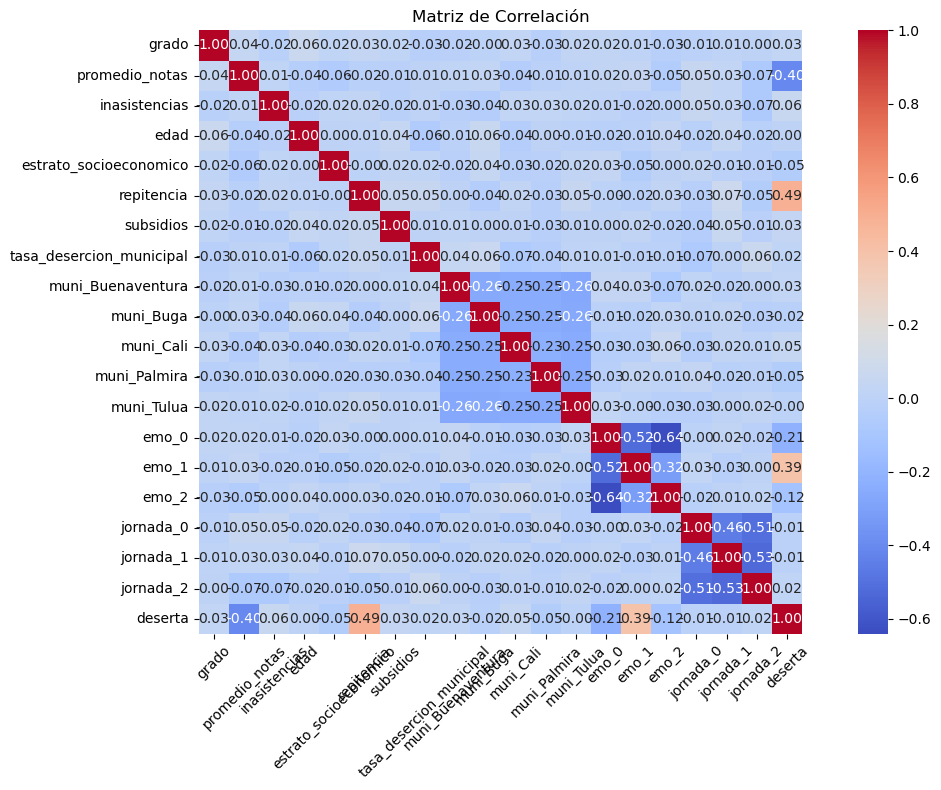

In [15]:
# Matriz de correlación
#corr_matrix = df_encoded.drop(columns=["deserta"]).corr()
# Calcular la matriz
corr = df_final.corr(numeric_only=True)

# Mostrar como mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Entrenamiento de modelo   RandomForestClassifier

In [16]:
df_reducido = df_final.drop(columns=[
    'nombre_estudiante',
    'repitencia',
    'tasa_desercion_municipal',
    'promedio_notas', 
    'estrato_socioeconomico',
    'jornada_0', 'jornada_1', 'jornada_2'
    #'emo_0', 'emo_2', 'emo_1'
])

X = df_reducido.drop(columns=['deserta'])
y = df_reducido['deserta']

In [27]:
# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Prediccion del modelo   RandomForestClassifier

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[202666   6781]
 [  8532 346145]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    209447
           1       0.98      0.98      0.98    354677

    accuracy                           0.97    564124
   macro avg       0.97      0.97      0.97    564124
weighted avg       0.97      0.97      0.97    564124



In [33]:
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[202666   6781]
 [  8532 346145]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    209447
           1       0.98      0.98      0.98    354677

    accuracy                           0.97    564124
   macro avg       0.97      0.97      0.97    564124
weighted avg       0.97      0.97      0.97    564124



#### Entrenamiento de modelo Multi Layer Perceptron

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(random_state=42)

#### Prediccion del modelo   Multi Layer Perceptron

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = mlp.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[196619  12828]
 [ 18616 336061]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93    209447
           1       0.96      0.95      0.96    354677

    accuracy                           0.94    564124
   macro avg       0.94      0.94      0.94    564124
weighted avg       0.94      0.94      0.94    564124



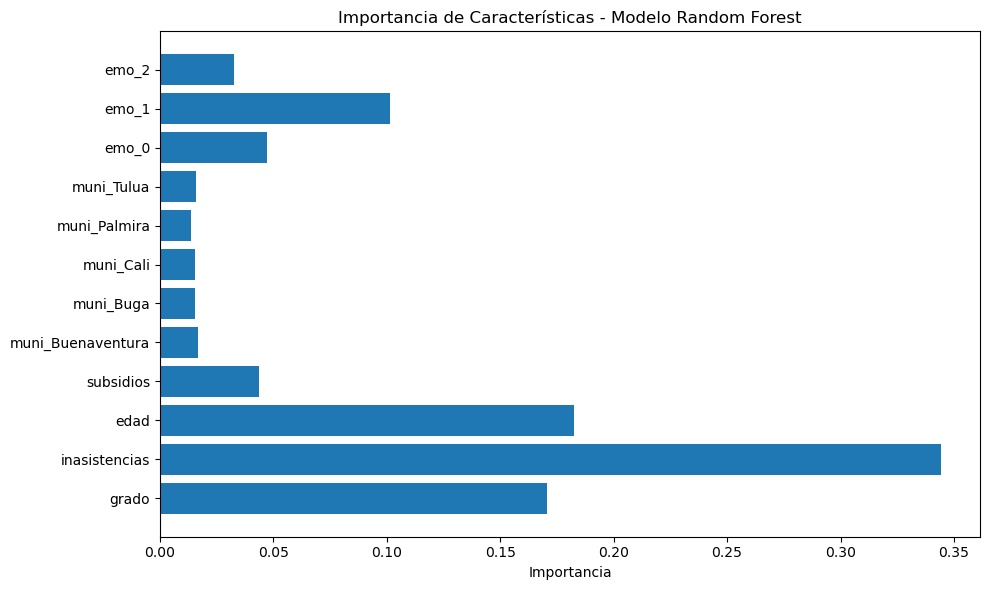

In [38]:
# Gráfico: Importancia de características
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de Características - Modelo Random Forest")
plt.tight_layout()
plt.show()

----- Comparación de Modelos -----

Modelo: Random Forest
Accuracy: 0.97
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Matriz de Confusión:
[[202666   6781]
 [  8532 346145]]

Modelo: Red Neuronal (MLP)
Accuracy: 0.94
Precision: 0.96
Recall: 0.95
F1 Score: 0.96
Matriz de Confusión:
[[196619  12828]
 [ 18616 336061]]


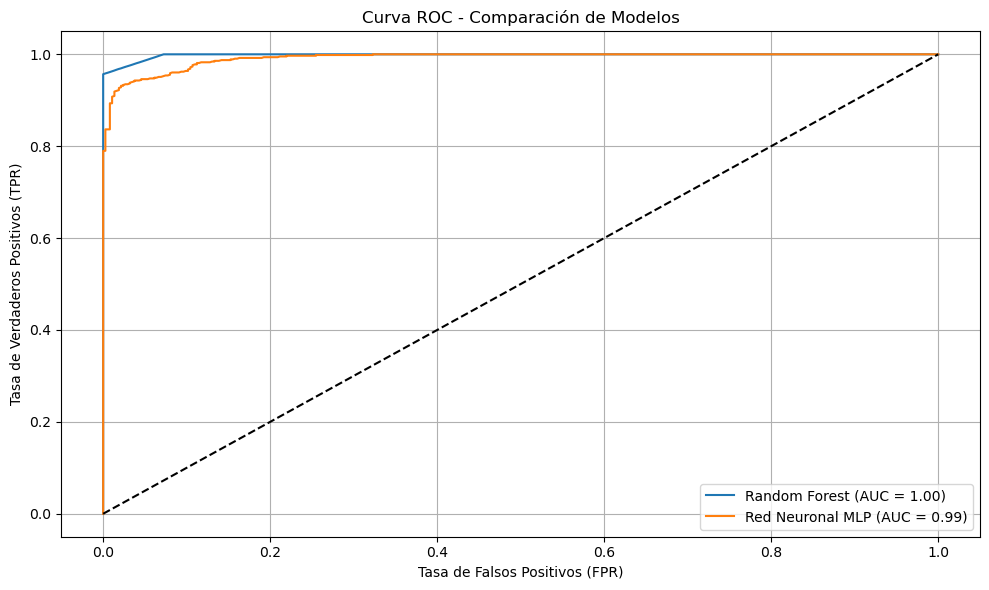

In [39]:
#Comparación de desempeño entre Random Forest y Red Neuronal (MLP), cálculo de métricas y gráfico de la curva ROC
# ====== Métricas del modelo Random Forest ======
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

metrics_rf = {
    "Modelo": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "Matriz de Confusión": confusion_matrix(y_test, y_pred_rf)
}

# ====== Métricas del modelo Red Neuronal (MLP) ======
y_pred_mlp = mlp.predict(X_test)
y_probs_mlp = mlp.predict_proba(X_test)[:, 1]

metrics_mlp = {
    "Modelo": "Red Neuronal (MLP)",
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": precision_score(y_test, y_pred_mlp),
    "Recall": recall_score(y_test, y_pred_mlp),
    "F1 Score": f1_score(y_test, y_pred_mlp),
    "Matriz de Confusión": confusion_matrix(y_test, y_pred_mlp)
}

# ====== Mostrar métricas por consola ======
print("----- Comparación de Modelos -----")
for modelo, metrics in [("Random Forest", metrics_rf), ("Red Neuronal", metrics_mlp)]:
    print(f"\nModelo: {metrics['Modelo']}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Matriz de Confusión:\n{metrics['Matriz de Confusión']}")

# ====== Gráfico de la curva ROC ======
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_probs_mlp)
auc_rf = auc(fpr_rf, tpr_rf)
auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'Red Neuronal MLP (AUC = {auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Comparación de Modelos")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import joblib

# Guardar el modelo
joblib.dump(rf_model, 'modelo_random_forest.pkl')
print("✔ Modelo Random Forest guardado como modelo_random_forest.pkl")

✔ Modelo Random Forest guardado como modelo_random_forest.pkl


In [41]:
joblib.dump(mlp, 'modelo_mlp.pkl')
print("✔ Modelo MLP guardado como modelo_mlp.pkl")

✔ Modelo MLP guardado como modelo_mlp.pkl


In [ ]:
# Cargar modelo Random Forest desde archivo
modelo_cargado = joblib.load('modelo_random_forest.pkl')

# Usarlo igual que siempre
y_pred = modelo_cargado.predict(X_test)
